In [278]:
import pandas as pd
import numpy as np
import statistics
import re
import matplotlib.pyplot as plt
from datetime import datetime

In [190]:
data_global = pd.read_csv("WHO-COVID-19-GLOBAL-data.csv")
data_global.rename(columns = {' Country': 'Country', 
                             ' Country_code':'Country_code', ' WHO_region':'WHO_region'}, inplace = True)
display(data_global.head())
display (data_global.dtypes.value_counts())

,Country_code,Country,WHO_region
0,AF,Afghanistan,EMRO
1,AL,Albania,EURO
2,DZ,Algeria,AFRO
3,AS,American Samoa,WPRO
4,AD,Andorra,EURO


object    3
dtype: int64

In [191]:
data_global.columns

Index(['Country_code', 'Country', 'WHO_region'], dtype='object')

In [192]:
data_global.isnull().sum()

Country_code    1
Country         0
WHO_region      0
dtype: int64

In [193]:
data_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country_code  234 non-null    object
 1   Country       235 non-null    object
 2   WHO_region    235 non-null    object
dtypes: object(3)
memory usage: 5.6+ KB


In [194]:
data_global.describe()

,Country_code,Country,WHO_region
count,234,235,235
unique,234,235,7
top,LA,Cook Islands,EURO
freq,1,1,62


In [195]:
data_population=pd.read_csv("Population_Data.csv")

In [196]:
data_population

,Countries and Territories,Population
0,Afghanistan,38041757.0
1,Albania,2862427.0
2,Algeria,43053054.0
3,Andorra,76177.0
4,Angola,31825299.0
...,...,...
208,Wallis_and_Futuna,NaN
209,Western_Sahara,582458.0
210,Yemen,29161922.0
211,Zambia,17861034.0


In [197]:
data_population.rename(columns = {"Countries and Territories":"Country"}, inplace=True)

In [198]:
data_population.columns

Index(['Country', 'Population'], dtype='object')

In [199]:
def clean_text(txt):
    txt = re.sub('[^A-Za-z0-9]+','',txt)
    txt = txt.upper()
    return txt
data_population['Country']= data_population['Country'].apply(clean_text)
data_global['Country']= data_global['Country'].apply(clean_text)

In [200]:
data_merge = data_global.merge(data_population, how = "left", left_on="Country", right_on="Country")
data_merge.rename(columns = {"Population":"total_population"}, inplace = True)

In [201]:
len(data_merge)

235

In [202]:
data_merge[data_merge['total_population'].isna()]

,Country_code,Country,WHO_region,total_population
3,AS,AMERICANSAMOA,WPRO,NaN
24,BO,BOLIVIAPLURINATIONALSTATEOF,AMRO,NaN
25,BQ,BONAIRESINTEUSTATIUSANDSABA,AMRO,NaN
34,CV,CABOVERDE,AFRO,NaN
46,CK,COOKISLANDS,WPRO,NaN
48,CI,CTEDIVOIRE,AFRO,NaN
54,KP,DEMOCRATICPEOPLESREPUBLICOFKOREA,SEARO,NaN
73,GF,FRENCHGUIANA,AMRO,NaN
84,GP,GUADELOUPE,AMRO,NaN
98,IR,IRANISLAMICREPUBLICOF,EMRO,NaN


In [203]:
data_africa = pd.read_csv("WHO-COVID-19-data-africa.csv")
data_americas = pd.read_csv("WHO-COVID-19-data-americas.csv")
data_eastern_mediterranean = pd.read_csv("WHO-COVID-19-data-eastern-mediterranean.csv")
data_europe = pd.read_csv("WHO-COVID-19-data-europe.csv")
data_south_east_asia = pd.read_csv("WHO-COVID-19-data-south-east-asia.csv")
data_west_pacific = pd.read_csv("WHO-COVID-19-data-west-pacific.csv")

In [204]:
merged_country_data = pd.concat([data_africa, data_americas, 
                                 data_eastern_mediterranean, data_europe,
                                data_south_east_asia, data_west_pacific])
merged_country_data.rename(columns = {' Country': 'Country'}, inplace = True)
merged_country_data['Country'] = merged_country_data['Country'].apply(clean_text)
len(merged_country_data)

71136

In [205]:
merged_country_data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,03-01-20,DZ,ALGERIA,AFRO,0,0,0,0
1,04-01-20,DZ,ALGERIA,AFRO,0,0,0,0
2,05-01-20,DZ,ALGERIA,AFRO,0,0,0,0
3,06-01-20,DZ,ALGERIA,AFRO,0,0,0,0
4,07-01-20,DZ,ALGERIA,AFRO,0,0,0,0


In [206]:
subset = merged_country_data[' Cumulative_cases'].loc[merged_country_data['Country'] == 'AFGHANISTAN']
subset

0          0
1          0
2          0
3          0
4          0
       ...  
299    41032
300    41145
301    41268
302    41334
303    41425
Name:  Cumulative_cases, Length: 304, dtype: int64

In [207]:
print("Number of countries in WHO global dataset: ", len(set(data_merge['Country'])))
print("Number of countries in given specific continet dataset: ", len(set(merged_country_data['Country'])))

Number of countries in WHO global dataset:  235
Number of countries in given specific continet dataset:  234


In [208]:
print("Finding the missing country")
x = set(merged_country_data['Country']).symmetric_difference(set(data_merge['Country']))
print(x)

Finding the missing country
{'OTHER'}


In [227]:
for index in data_merge.index:
    subset = merged_country_data.loc[merged_country_data['Country'] == data_merge['Country'].iloc[index]]
    if(len(subset) > 0):
        data_merge['Cumulative_cases'].iloc[index] = subset[' Cumulative_cases'].iloc[-1]
        data_merge['Cumulative_deaths'].iloc[index] = subset[' Cumulative_deaths'].iloc[-1]
print("Completed")

Completed


In [230]:
data_merge

,Country_code,Country,WHO_region,total_population,Cumulative_cases,Cumulative_deaths
0,AF,AFGHANISTAN,EMRO,38041757.0,41425.0,1536.0
1,AL,ALBANIA,EURO,2862427.0,20875.0,509.0
2,DZ,ALGERIA,AFRO,43053054.0,57651.0,1956.0
3,AS,AMERICANSAMOA,WPRO,NaN,0.0,0.0
4,AD,ANDORRA,EURO,76177.0,4756.0,75.0
...,...,...,...,...,...,...
230,VN,VIETNAM,WPRO,96462108.0,1180.0,35.0
231,WF,WALLISANDFUTUNA,WPRO,NaN,1.0,0.0
232,YE,YEMEN,EMRO,29161922.0,2067.0,600.0
233,ZM,ZAMBIA,AFRO,17861034.0,16432.0,349.0


In [231]:
set(data_merge['WHO_region'])

{'AFRO', 'AMRO', 'EMRO', 'EURO', 'Other', 'SEARO', 'WPRO'}

In [349]:
def plot_country_with_max_deaths(global_dataset, deaths_dataset, WHO_regions, y_axis_column):
    for who_region in WHO_regions:
        country_subset = global_dataset.loc[global_dataset['WHO_region'] == who_region]
        max_death_country = country_subset['Country'].loc[country_subset['Cumulative_deaths']
                                                          == max(country_subset['Cumulative_deaths'])].values
        if len(max_death_country) > 0:
            time_series_subset = deaths_dataset[['Date_reported', y_axis_column]].loc[deaths_dataset['Country'] 
                                                                            == max_death_country[0]]
            time_series_subset['Date_reported'] = pd.to_datetime(time_series_subset['Date_reported'])
            date_reported = list(time_series_subset['Date_reported'].values)
            date_reported.sort()
            fig, ax = plt.subplots(figsize=(20, 6))
            ax.plot(date_reported, time_series_subset[y_axis_column])
            ax.set_xlabel('Dates Reported')
            ax.set_ylabel(y_axis_column)
            ax.set_title('WHO_region: {}, Country: {}'.format(who_region, max_death_country[0]))

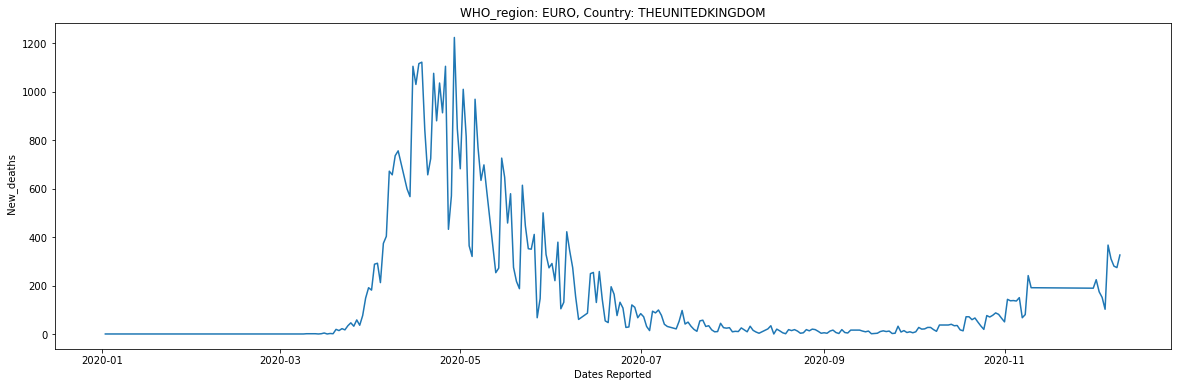

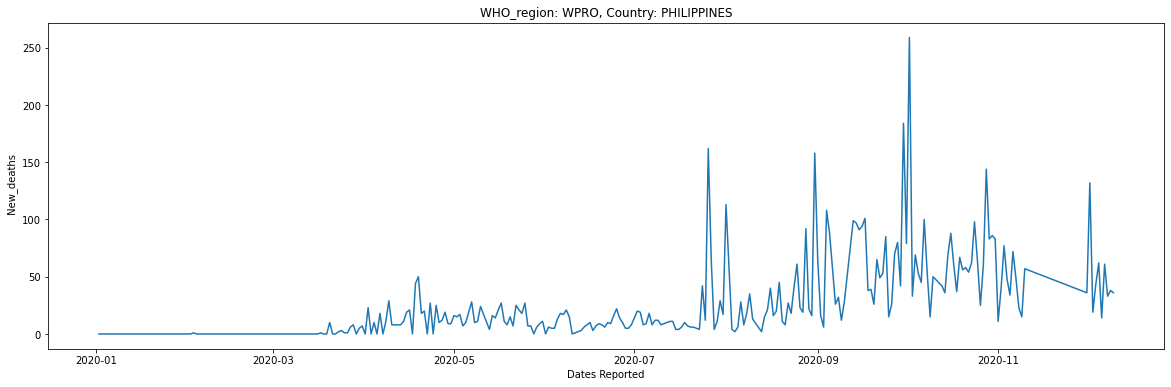

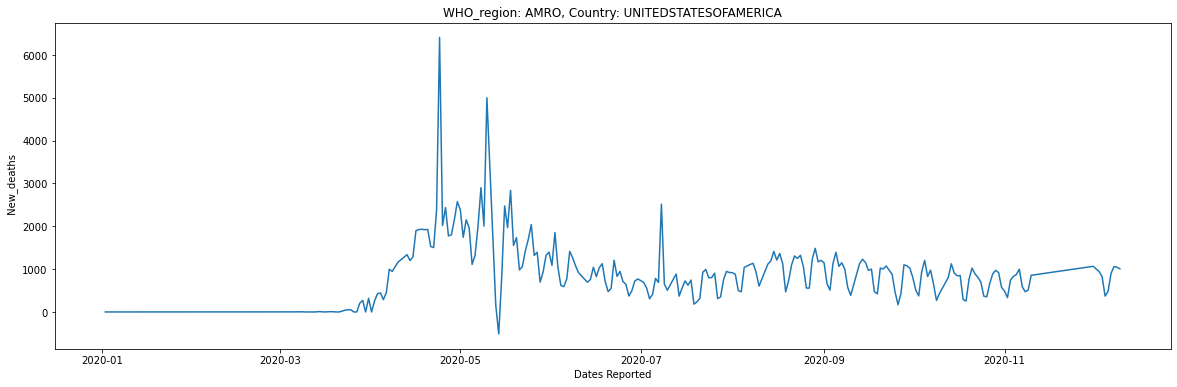

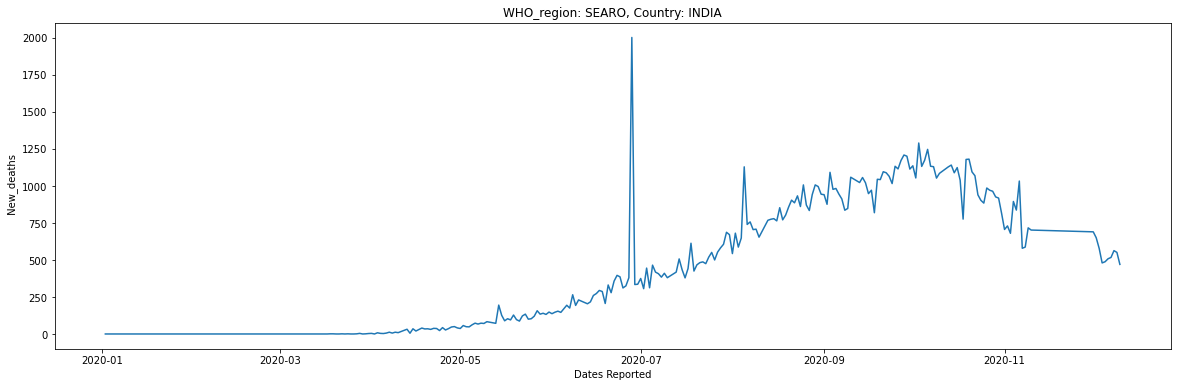

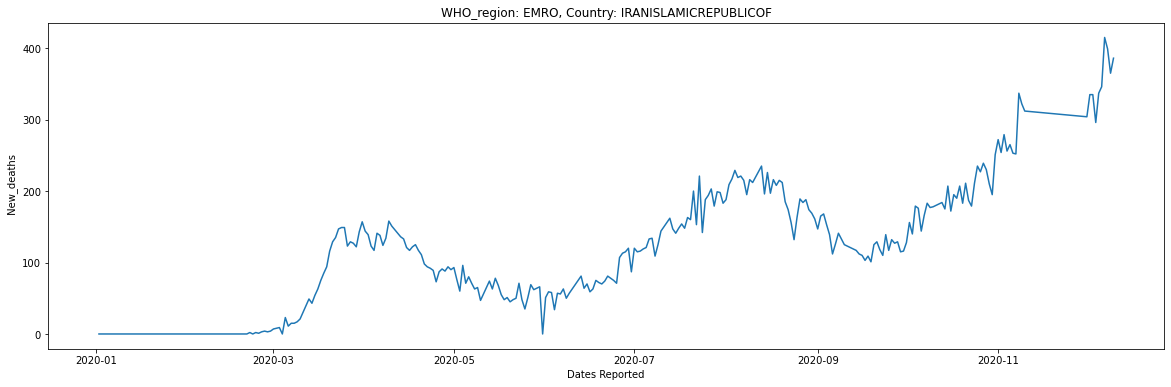

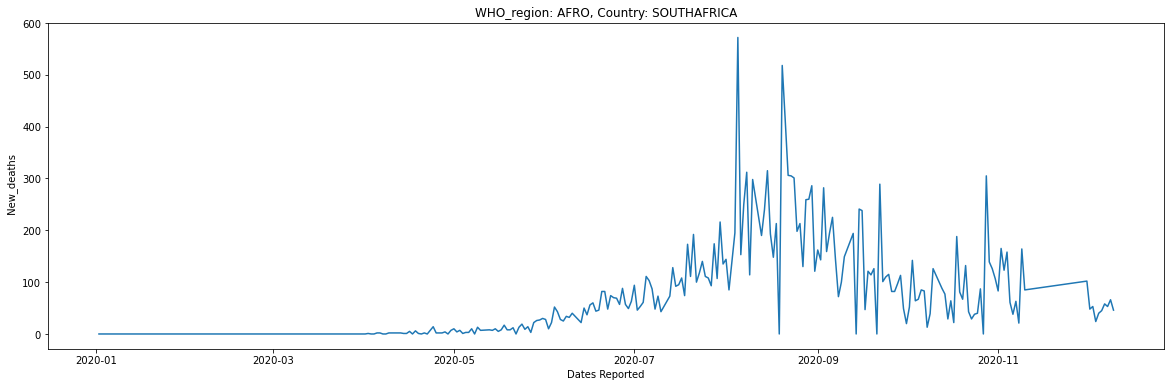

In [350]:
who_region_list = list(set(data_merge['WHO_region']))
plot_country_with_max_deaths(data_merge, merged_country_data, who_region_list, ' New_deaths')

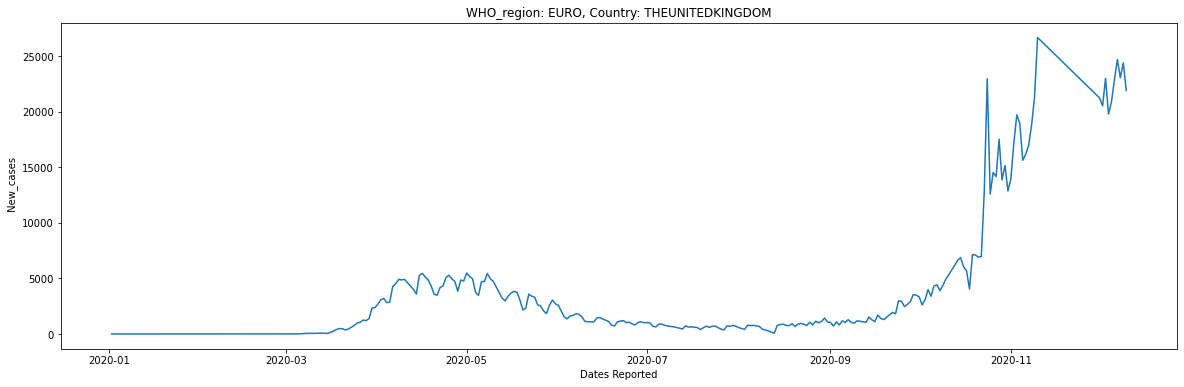

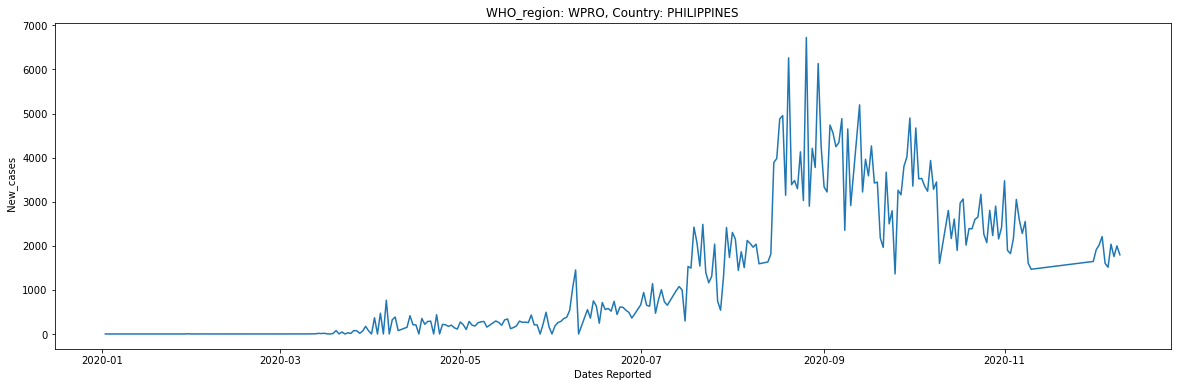

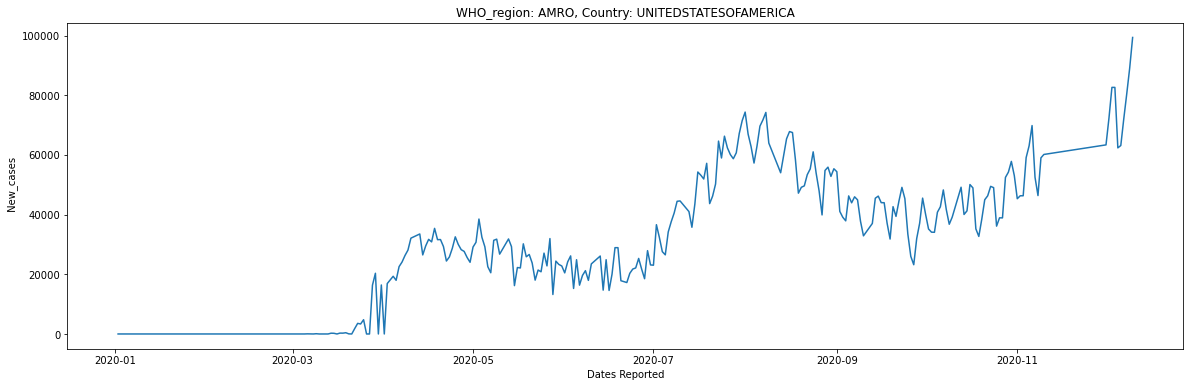

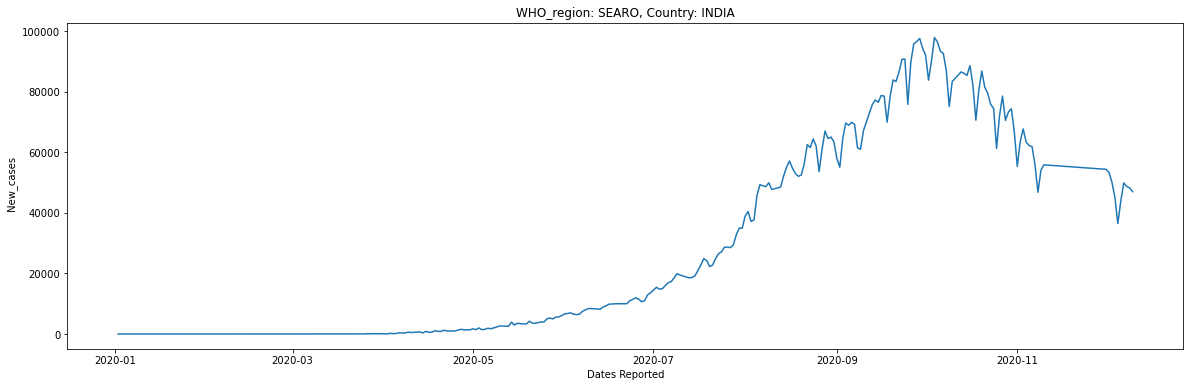

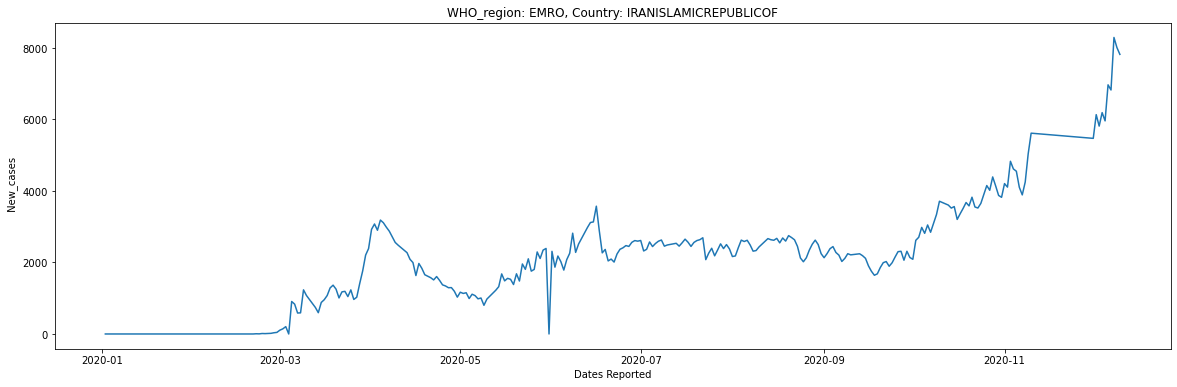

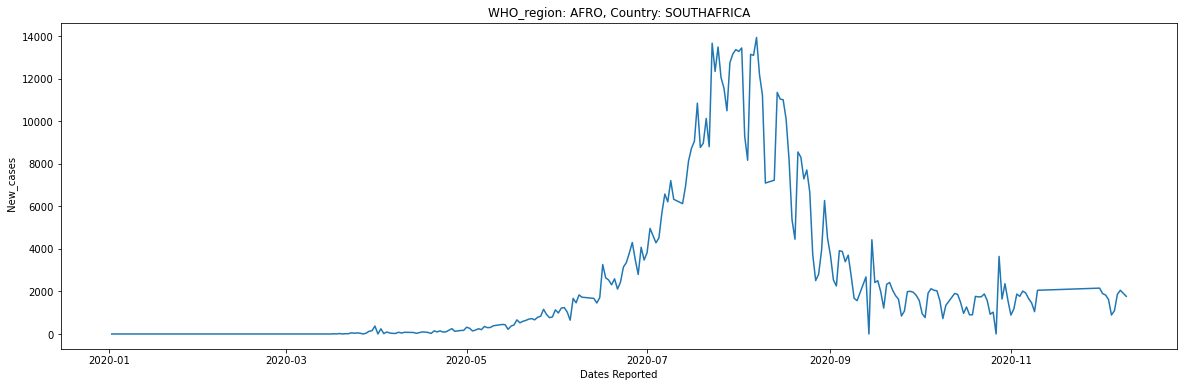

In [351]:
who_region_list = list(set(data_merge['WHO_region']))
plot_country_with_max_deaths(data_merge, merged_country_data, who_region_list, ' New_cases')